In [1]:
import numpy as np
from scipy.integrate import solve_bvp
from scipy.interpolate import Akima1DInterpolator
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
h = 1 #The Planck constant
m = 1 #The mass of the particle
sigma = 1 #The initial standard deviation
k = 1 #The initial momentum
a = -5 #The initial center
xl = -10 #Left boundary
xr = 10 #Right boundary
N = 10000 #The initial number of points on the spatial grid
T = 50 #Number of time steps
dt = 0.02 #The time step

In [4]:
# A useful function
def useful(t):
    return 1 + (h**2*t**2)/(4*sigma**4*m**2)

In [5]:
x = np.linspace(xl, xr, N)
one_step = np.linspace(xl, xr, N) + k/m*dt 

y_ini = np.zeros((4, x.size))
y_ini[0] = x
y_ini[1] = (useful(2*dt))**(-0.25)*np.ones(x.size)
y_ini[3] = 1/(2*sigma**2)*(1-(x-a)**2/(2*sigma**2))*(y_ini[1])**3

positions = np.zeros([T, N])
positions[0] = x
positions[1] = x + k/m*dt
fun0 = Akima1DInterpolator(x, positions[0])
fun1 = Akima1DInterpolator(x, positions[1])

In [6]:
interpol = []
interpol.append(fun0)
interpol.append(fun1)

In [7]:
# Defining the directional field
def fun(x, y):
    der_x = 1/y[1]**2
    der_gamma = y[2]/y[1]**2
    der_beta = ((1/(2*sigma**2))*(1-(x-a)**2/(2*sigma**2))*(y[1]**3) -
                (1/sigma**2)*(x-a)*y[2]*(y[1]**2) - (2*m/h**2)*y[3]/y[1])
    der_alpha = -m*(y[0] - 2*fun1(x) + fun0(x)) / dt**2 / y[1]**2 - 0 / y[1]**2
    return np.vstack((der_x, der_gamma, der_beta, der_alpha))

# The boundary conditions
def bc(ya, yb):
    res1 = ya[0] - (a + useful(2*dt)*(xl-a) + k/m*2*dt)
    res2 = ya[1] - (useful(2*dt))**(-0.25)
    res3 = ya[2]
    res4 = ya[3] - 1/(2*sigma**2)*(1-(xl-a)**2/(2*sigma**2))*(useful(2*dt))**(-0.75)
    # Well let's stop enforcing any kind of boundary conditions
    # res1 = 0
    # res2 = 0
    # res3 = 0
    # res4 = 0
    return np.array([res1, res2, res3, res4])

res = solve_bvp(fun, bc, x, y_ini)

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\_bvp.py:312: RuntimeWarning: invalid value encountered in subtract
  0.125 * h * (f[:, 1:] - f[:, :-1]))
c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\_bvp.py:314: RuntimeWarning: overflow encountered in add
  col_res = y[:, 1:] - y[:, :-1] - h / 6 * (f[:, :-1] + f[:, 1:] +
c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\_bvp.py:314: RuntimeWarning: invalid value encountered in add
  col_res = y[:, 1:] - y[:, :-1] - h / 6 * (f[:, :-1] + f[:, 1:] +
c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\integrate\_

<IPython.core.display.Javascript object>


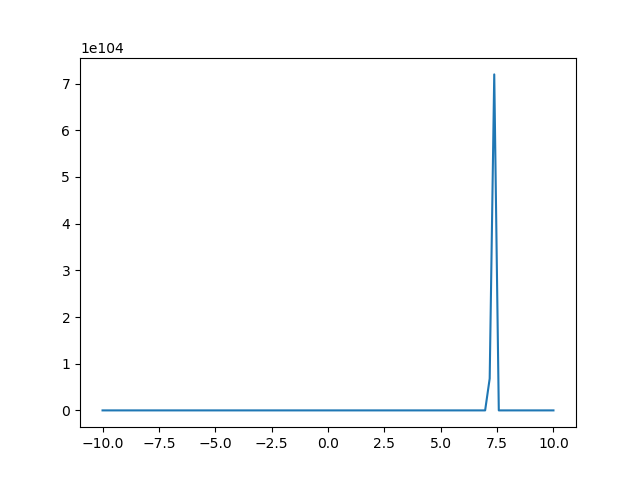

In [8]:
x_plot = np.linspace(xl, xr, 100)
y_plot = res.sol(x_plot)[1]
plt.plot(x_plot, y_plot)
plt.show()

In [9]:
y_plot

array([-4.91278785e+003, -3.81874851e+021, -9.67553575e+021,
       -3.18467035e+025, -1.90131849e+038,  3.04240274e+039,
        3.04281499e+039,  3.04330344e+039, -2.68630644e+040,
       -7.54770203e+044, -1.21197369e+041, -1.22146393e+041,
       -1.22117462e+041, -1.54522342e+041, -1.54555358e+041,
       -1.54543944e+041,  4.02424241e+041,  4.02445226e+041,
        4.04570850e+041,  4.04639584e+041,  4.04667578e+041,
        4.05970180e+041,  4.05964967e+041,  1.01457752e+042,
        1.01458020e+042,  1.01479630e+042,  4.85846645e+041,
        4.85333759e+041,  4.84954829e+041,  4.70391170e+041,
        4.70305027e+041,  4.52775631e+041,  4.53037827e+041,
        4.52949575e+041,  4.14407366e+041,  4.13872219e+041,
        2.64521413e+041,  2.64466138e+041,  2.64466670e+041,
        2.48756645e+041,  2.48712283e+041,  2.14010929e+041,
        2.13920497e+041,  2.13900044e+041,  2.04843299e+041,
        2.04786464e+041,  1.98433464e+041,  1.98387448e+041,
        1.98376411e+041,

In [10]:
interpol